# Cleaning Data with Pandas
Cleaning data is a huge topic. Some people claim that data scientists spend 80% of their time just cleaning their data. The topics that we will cover here are 

* handling missing values
* removing duplicates
* structuring data
* removing outliers
* finding the right data types (next lecture)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
sys.path.append("..")
from utils import count_down

# Missing values

A sentinel value is used to represent missing values for numbers. A special combinations of bits represents "Not a number" (NaN). This can be thought of as the numeric equivalent of `None`. In Python `NaN` is available through the `NumPy` package. To represent missing values in non-numeric data, Pandas just uses `None`.

`NaN` has very peculiar semantics when it comes to equality testing. In fact, `NaN` does not equal anything, not even itself.

In [2]:
np.nan == np.nan

False

This might seems strange at first, but starts to make sense when we think about the semantics of `NaN` or more generally `NA` as a placeholder for a value that is __N__ot **A**vailable. As `NA` just represents any value that we do not know, it would be wrong to say that a value that we do not know equals another value that we do not know. Therefore `NA` can not really equal anything.

To explicitly test for `NA` we need a separate function, that is provided by `pandas`.

In [3]:
pd.isna(np.nan)

True

In [4]:
pd.isna(42)

False

## Handling missing values

In [5]:
ebola = pd.read_csv('data/ebola_country_timeseries.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [6]:
ebola.sort_values(by='Day', ascending=True)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
116,3/28/2014,6,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
115,3/29/2014,7,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
114,3/31/2014,9,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
113,4/1/2014,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
112,4/4/2014,13,143.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,86.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN


In [7]:
ebola['Cases_Guinea'].value_counts(dropna=False).head()

NaN      29
86.0      3
495.0     2
112.0     2
390.0     2
Name: Cases_Guinea, dtype: int64

## Drop
The simplest way to deal with missing data is to simply drop it. However, this can lead to immense data loss, depending on how the data is organized.

In [8]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [9]:
ebola.dropna(how='all')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


## Fill
Instead missing values can be filled in so the rest of the data remains useable. Keep in mind that this always introduces artifacts.

We can fill with a constant value.

In [10]:
ebola.fillna(0).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


Or use some more advanced strategies to impute the data, such as compute a per column mean. This can be replaced by every simple summary statistic.

In [11]:
ebola.mean()

Day                     144.778689
Cases_Guinea            911.064516
Cases_Liberia          2335.337349
Cases_SierraLeone      2427.367816
Cases_Nigeria            16.736842
Cases_Senegal             1.080000
Cases_UnitedStates        3.277778
Cases_Spain               1.000000
Cases_Mali                3.500000
Deaths_Guinea           563.239130
Deaths_Liberia         1101.209877
Deaths_SierraLeone      693.701149
Deaths_Nigeria            6.131579
Deaths_Senegal            0.000000
Deaths_UnitedStates       0.833333
Deaths_Spain              0.187500
Deaths_Mali               3.166667
dtype: float64

In [12]:
ebola.fillna(ebola.mean()).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,2335.337349,10030.000000,16.736842,1.08,3.277778,1.0,3.5,1786.00000,1101.209877,2977.000000,6.131579,0.0,0.833333,0.1875,3.166667
1,1/4/2015,288,2775.000000,2335.337349,9780.000000,16.736842,1.08,3.277778,1.0,3.5,1781.00000,1101.209877,2943.000000,6.131579,0.0,0.833333,0.1875,3.166667
2,1/3/2015,287,2769.000000,8166.000000,9722.000000,16.736842,1.08,3.277778,1.0,3.5,1767.00000,3496.000000,2915.000000,6.131579,0.0,0.833333,0.1875,3.166667
3,1/2/2015,286,911.064516,8157.000000,2427.367816,16.736842,1.08,3.277778,1.0,3.5,563.23913,3496.000000,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
4,12/31/2014,284,2730.000000,8115.000000,9633.000000,16.736842,1.08,3.277778,1.0,3.5,1739.00000,3471.000000,2827.000000,6.131579,0.0,0.833333,0.1875,3.166667


Some more advanced techniques, such as the Expectation Maximization (EM) algorithm exist, but are not implemented in `pandas` directly. 

When dealing with serial data, it can make sense to fill missing values with previous or subsequent values.

In [13]:
ebola.fillna(method='ffill').head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [14]:
ebola.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ebola.fillna(method='ffill').tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
121,3/22/2014,0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [16]:
ebola.fillna(method='bfill').head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0


## Calculations with missing values
By default, `NumPy` is very strict about calculations involving `NA` values. Every operation involving `NA`s will result in `NA`. This correct in the sense that the final value of an operation such as `sum` can not be known if even a single value is unknown.

In [17]:
np.nansum([1, 2, np.nan, 3])

6.0

However, from a practical point of view this is not very useful. Therefore pandas takes the approach of gracefully ignoring `NA`s.

In [18]:
ebola['Cases_Guinea'].sum()

84729.0

This behavior can be changed if desired.

In [19]:
ebola['Cases_Guinea'].sum(skipna=False)

nan

# Removing duplicates
Duplicates can arise as part of messy data. It is important to identify them correctly and get rid of them, so they do not influence our statistics.

In [20]:
df1 = pd.DataFrame({
    'a': [1, 1, 1, 2, 2, 2],
    'b': [10, 20, 30, 40, 50, 50],
})

df1

,a,b
0,1,10
1,1,20
2,1,30
3,2,40
4,2,50
5,2,50


Check whether a row is a duplicate.

In [21]:
df1.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Restrict duplicate search to a subset of the columns.

In [22]:
df1.duplicated(subset='a')

0    False
1     True
2     True
3    False
4     True
5     True
dtype: bool

Finally drop the duplicates.

In [23]:
df1.drop_duplicates()

,a,b
0,1,10
1,1,20
2,1,30
3,2,40
4,2,50


## Exercise
Let's get back to out Pokemons! Keep only the first Pokemon of each **generation** by dropping duplicates.

In [24]:
pokemon = pd.read_csv("data/pokemon_no_duplicates.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [25]:
count_down(3)

You have 3 minutes time for the exercise.


In [26]:
pokemon.drop_duplicates(subset="Generation")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
151,152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
251,252,Treecko,Grass,NaN,310,40,45,35,65,55,70,3,False
386,387,Turtwig,Grass,NaN,318,55,68,64,45,55,31,4,False
493,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True
649,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False


# Tidy data

Keeping data in a consistent format is one of the most crucial points in data science. Cleaning data is where you often spend most of the time and where you can also lose most of the time if you do it wrong. 

However, if all datasets looks differently, what is the common theme of tidy data? Fortunately, if things look dark in data science, there is always one guy who saves the day...

<img width="600" height="400" src="https://upload.wikimedia.org/wikipedia/commons/f/fa/Hadley-wickham2016-02-04.jpg" alt="Hadley Wickham" />

<span style="font-size: 2em">Hadley Wickham (Reinventor of tidy data)</span>

Hadley is one of the most prolific contributers to scientific software and has written many papers about the topic. This includes a paper about [tidy data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf). 
He admits that the concept of tidy data is just a reformulation of [Codd's normal forms](https://en.wikipedia.org/wiki/Database_normalization) for relational data bases in terms of statistics. Yet it was a very important step on the way to having tidy datasets.
However he does everything in `R`. Still we can use the concepts and transfer them to the Python ecosystem. So how should tidy data looks like?

> Tidy datasets are easy to manipulate, model and visualize, and have a specific structure:
>
> each variable is a column, 
>
> each observation is a row, 
>
> and each type of observational unit
is a table.

> A dataset is a collection of values, usually either numbers (if quantitative) or strings (if
qualitative). Values are organized in two ways. Every value belongs to a variable and an
observation. A variable contains all values that measure the same underlying attribute (like
height, temperature, duration) across units. An observation contains all values measured on
the same unit (like a person, or a day, or a race) across attributes.

from Wickham, H., 2014. Tidy data. Journal of Statistical Software, 59(10), pp.1-23.

That sounds fairly straightforward. So what could possibly go wrong? Actually a lot...

* Column headers are values, not variable names
* Multiple variables are stored in one column
* Variables are stored in both rows and columns
* Multiple types of observational units are stored in the same table
* A single observational unit is stored in multiple tables

We will now go through these cases and look at methods to transform them to a tidy format.

# Column headers are values, not variable names

## Method: Melting
If values are stored in column headers, the dataframe has to be melted down. This simply works by specifing which columns you want to keep or melt respectively. The messy columns are then melted into two columns, a variable column that contains the old column headers and a value column, where the original values are put.

The following data set investigates how belonging to a certain religious group relates to income. 

In [27]:
pew = pd.read_csv('data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


![Melt Illustration](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png)

In [28]:
(pew
 .melt(id_vars='religion')
 .head()
 )

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [29]:
(pew
 .melt(id_vars='religion',
       var_name='income', 
       value_name='count')
 .head()
)

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


Billboard charts from the year 2000 showing the rank of each song for 75 weeks after it first entered the charts.

In [30]:
billboard = pd.read_csv('data/billboard.csv')
billboard.tail()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,matchbox twenty,Bent,4:12,2000-04-29,60,37.0,29.0,24.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
(billboard
    .melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
          var_name='week',
          value_name='rank')
     .tail())

,year,artist,track,time,date.entered,week,rank
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN
24091,2000,matchbox twenty,Bent,4:12,2000-04-29,wk76,NaN


Drop all missing values.

In [32]:
(billboard
    .melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
          var_name='week',
          value_name='rank')
     .dropna()
     .tail())

,year,artist,track,time,date.entered,week,rank
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0
20350,2000,Creed,Higher,5:16,1999-09-11,wk65,49.0


Sorting the values as a last step is always a good idea.

In [33]:
(billboard
    .melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
          var_name='week',
          value_name='rank')
     .dropna()
     .sort_values(by=['artist', 'track'])
     .head()
)

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0


## Exercise
The following data frame shows mean health points for each generation and type of Pokemon. Transform the data into a tidy format! 

In [34]:
mean_hp_per_generation_and_type = pd.read_csv("data/mean_hp_per_generation_and_type.csv")
mean_hp_per_generation_and_type

,Generation,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,55.416667,NaN,64.333333,54.444444,82.5,63.571429,63.833333,NaN,45.000000,65.000000,58.125000,77.500000,78.681818,64.500000,63.875000,53.888889,NaN,64.535714
1,2,56.500000,66.000000,NaN,61.666667,58.0,42.500000,66.375000,NaN,60.000000,58.888889,81.666667,60.000000,87.200000,85.000000,87.714286,72.500000,70.000000,76.388889
2,3,49.833333,55.000000,77.857143,57.500000,NaN,76.500000,64.166667,NaN,42.000000,62.416667,62.500000,80.000000,68.666667,81.000000,60.500000,65.250000,65.555556,70.166667
3,4,58.750000,80.000000,78.000000,62.857143,85.0,55.000000,70.000000,NaN,90.833333,71.461538,91.500000,81.666667,80.529412,67.833333,69.000000,60.666667,74.666667,73.923077
4,5,59.111111,63.538462,84.285714,62.714286,NaN,81.428571,81.250000,79.0,53.200000,65.800000,80.111111,63.000000,72.352941,65.000000,72.214286,71.833333,62.750000,78.000000
5,6,54.333333,88.333333,77.750000,57.666667,80.0,80.000000,66.000000,62.5,60.500000,78.800000,NaN,75.000000,60.750000,57.500000,72.000000,69.250000,55.250000,57.600000


In [35]:
count_down(5)

You have 5 minutes time for the exercise.


In [36]:
(mean_hp_per_generation_and_type
 .melt(id_vars="Generation", var_name="Type", value_name="HP"))

,Generation,Type,HP
0,1,Bug,55.416667
1,2,Bug,56.500000
2,3,Bug,49.833333
3,4,Bug,58.750000
4,5,Bug,59.111111
5,6,Bug,54.333333
6,1,Dark,NaN
7,2,Dark,66.000000
8,3,Dark,55.000000
9,4,Dark,80.000000


# Multiple variables stored in one column
The following dataset contains cases of tuberculosis by country, year, and demographic group. The demographic groups are broken down by sex (m, f) and age (0-14, 15-25, 25-34, 35-44, 45-54, 55-64, unknown).


In [37]:
tuberculosis = pd.read_csv('data/tb.csv')
tuberculosis.tail()

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN
5768,ZW,2008,NaN,NaN,127.0,614.0,0.0,3316.0,704.0,263.0,...,NaN,NaN,145.0,840.0,0.0,2890.0,467.0,174.0,105.0,0.0


In [38]:
(tuberculosis
    .melt(id_vars=['iso2', 'year'], var_name='demographics', value_name='count')
    .head())

,iso2,year,demographics,count
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


Giving meanful names is an important part of data cleaning.

In [39]:
tuberculosis_melted = (
    tuberculosis
        .melt(id_vars=['iso2', 'year'], var_name='demographics', value_name='count')
        .rename({'iso2': 'country'}, axis='columns')
)
tuberculosis_melted.head()

,country,year,demographics,count
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


In [40]:
tuberculosis_melted.dtypes

country          object
year              int64
demographics     object
count           float64
dtype: object

## Method: Vectorized string manipulation
If more than one value is stored in a column you have to split the column into multiple ones. This can often achieved by using the `.str` attribute of a column. This provides an interface to vectorized versions of well known Python string methods. Additionally, it provides vectorized version of the regular expressions library `re`. Finally it provides some `pandas` specific string methods such as `.len` or `.contains`. You can generally assume that the method you need for your specific string cleaning tasks is already there.

Indexing and `.split` are very useful for our current problem.

In [41]:
tuberculosis_melted['sex'] = tuberculosis_melted['demographics'].str[:1]
tuberculosis_melted['age'] = tuberculosis_melted['demographics'].str[1:]

tuberculosis_melted.head()

,country,year,demographics,count,sex,age
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04


Alternatively extract could be used. This method is better suited for more complex patterns only describable by regular expression.
More about regular expressions can be found in the Python docs (https://docs.python.org/3.6/library/re.html ). They are an indispensable tool when it comes to parsing and cleaning very quirky datasets.

In [42]:
tuberculosis_melted['demographics'].str.extract(r'([fm])(.+)', expand=True)

,0,1
0,m,04
1,m,04
2,m,04
3,m,04
4,m,04
5,m,04
6,m,04
7,m,04
8,m,04
9,m,04


In [43]:
tuberculosis_melted[['sex', 'age']] = tuberculosis_melted['demographics'].str.extract(r'([fm])(.+)', expand=True)
tuberculosis_melted.head()

,country,year,demographics,count,sex,age
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04


## Exercise
In the following dataset the types of the Pokemon are merged in a single column `Type`. It contains only a sinlge value if the Pokemon has only a single type or two types separated by `"-"` if the Pokemon has two types. Restore the original state using vectorized string operations.

In [44]:
pokemon_merged_type = pd.read_csv("data/pokemon_merged_type.csv")
pokemon_merged_type.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,Grass - Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,Grass - Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,False,Grass - Poison
3,4,Charmander,309,39,52,43,60,50,65,1,False,Fire
4,5,Charmeleon,405,58,64,58,80,65,80,1,False,Fire


In [45]:
count_down(3)

You have 3 minutes time for the exercise.


The vectorized version of `.split` is very well suited for this case.

In [46]:
pokemon_merged_type[["Type 1", "Type 2"]] = pokemon_merged_type["Type"].str.split(" - ", expand=True)
pokemon_merged_type.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Type 1,Type 2
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,Grass - Poison,Grass,Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,Grass - Poison,Grass,Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,False,Grass - Poison,Grass,Poison
3,4,Charmander,309,39,52,43,60,50,65,1,False,Fire,Fire,None
4,5,Charmeleon,405,58,64,58,80,65,80,1,False,Fire,Fire,None


In [47]:
# This is only for regex lovers. When possible look for simpler solutions before moving to regexes.
pokemon_merged_type[["Type 1", "Type 2"]] = pokemon_merged_type["Type"].str.extract(r"(\w+)(?:\s-\s(\w+))?", expand=True)
pokemon_merged_type.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Type 1,Type 2
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,Grass - Poison,Grass,Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,Grass - Poison,Grass,Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,False,Grass - Poison,Grass,Poison
3,4,Charmander,309,39,52,43,60,50,65,1,False,Fire,Fire,NaN
4,5,Charmeleon,405,58,64,58,80,65,80,1,False,Fire,Fire,NaN


# Variables are stored in both rows and columns
> The most complicated form of messy data occurs when variables are stored in both rows and columns. The code below loads daily weather data from the Global Historical Climatology Network for one weather station (MX17004) in Mexico for five months in 2010.

In [48]:
weather = pd.read_csv('data/weather.csv')
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
weather_melt = (
    weather
        .melt(id_vars=['id', 'year', 'month', 'element'],
              var_name='day',
              value_name='temp')
)
weather_melt.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


In [50]:
weather_melt = (
    weather
        .melt(id_vars=['id', 'year', 'month', 'element'],
              var_name='day',
              value_name='temp')
        .dropna()
)
weather_melt.head()

,id,year,month,element,day,temp
20,MX17004,2010,12,tmax,d1,29.9
21,MX17004,2010,12,tmin,d1,13.8
24,MX17004,2010,2,tmax,d2,27.3
25,MX17004,2010,2,tmin,d2,14.4
40,MX17004,2010,11,tmax,d2,31.3


## Method: Pivoting
If a variable is stored in a row, it has to be pivoted into a column. You have to specify what comprises the index for a single observation. Then what `columns` to pivot and which `values` to put in the new columns.

![Pivot Illustration](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)

In [51]:
(weather_melt
     .pivot_table(index=['id', 'year', 'month', 'day'], 
                  columns='element', 
                  values='temp')
     .head())


element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4

In [52]:
weather_pivot = (
    weather_melt
     .pivot_table(index=['id', 'year', 'month', 'day'], 
                  columns='element', 
                  values='temp')
     .reset_index()
)
weather_pivot.columns.name = ''  # Remove the name that was given to the columns index.
weather_pivot.head()

,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


In [53]:
weather_pivot = (
    weather_melt
     .pivot_table(index=['id', 'year', 'month', 'day'], 
                  columns='element', 
                  values='temp')
     .reset_index()
     .sort_values(['year', 'month', 'day'])
    
)
weather_pivot.columns.name = ''
weather_pivot.head()

,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


In [54]:
weather_tidy = (
    weather_melt
     .pivot_table(index=['id', 'year', 'month', 'day'], 
                  columns='element', 
                  values='temp')
     .reset_index()
)

weather_tidy.columns.name = ''

weather_tidy['day'] = weather_tidy['day'].str[1:]
weather_tidy['day'] = weather_tidy['day'].astype('int')

weather_tidy = weather_tidy.sort_values(['year', 'month', 'day'])

weather_tidy.head()



,id,year,month,day,tmax,tmin
0,MX17004,2010,1,30,27.8,14.5
2,MX17004,2010,2,2,27.3,14.4
4,MX17004,2010,2,3,24.1,14.4
1,MX17004,2010,2,11,29.7,13.4
3,MX17004,2010,2,23,29.9,10.7


You can find more detailed information in the pandas docs at https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html.

## Exercise
The following dataset shows attack statistics for different Pokemon types. Can you pivot them into a tidy format?

In [55]:
attack_statistics = pd.read_csv("data/pokemon_attack_statistics.csv")
attack_statistics.head()

,Type,statistic,Attack
0,Bug,min,10.000000
1,Bug,mean,65.222222
2,Bug,max,135.000000
3,Dark,min,50.000000
4,Dark,mean,86.250000


In [56]:
count_down(4)

You have 4 minutes time for the exercise.


In [57]:
attack_statistics.pivot_table(index="Type", columns="statistic", values="Attack").reset_index()

statistic,Type,max,mean,min
0,Bug,135.0,65.222222,10.0
1,Dark,131.0,86.250000,50.0
2,Dragon,150.0,102.625000,50.0
3,Electric,123.0,67.777778,30.0
4,Fairy,131.0,61.529412,20.0
5,Fighting,140.0,94.720000,35.0
6,Fire,140.0,81.608696,40.0
7,Flying,115.0,71.666667,30.0
8,Ghost,115.0,66.652174,30.0
9,Grass,130.0,70.909091,27.0


# Multiple types in one table
Having multiple types of observations in one table leads to redundancy, which in turn often entails inconsistency.

In [58]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
billboard_tidy = (
    billboard
    .melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
          var_name='week',
          value_name='rank')
     .dropna()
     .sort_values(by=['artist', 'track'])
)

print('Number of entries ', len(billboard_tidy))
billboard_tidy.head()

Number of entries  5307


,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0


In [60]:
songs = (billboard_tidy[['artist', 'track', 'year', 'time']]
    .drop_duplicates())
songs['song_id'] = songs.index

print('Number of songs ', len(songs))
songs.head()

Number of songs  317


,artist,track,year,time,song_id
0,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0
1,2Ge+her,The Hardest Part Of ...,2000,3:15,1
2,3 Doors Down,Kryptonite,2000,3:53,2
3,3 Doors Down,Loser,2000,4:24,3
4,504 Boyz,Wobble Wobble,2000,3:35,4


## Method: Merging
Merging is what relational algebra and SQL databases refer to as joins. Merging involves two dataframes (*left* and *right*) for which join keys are specified (either a *column* or an *index*).
The merge algorithm then walks through both keys and combines rows for which the join keys match. This standard behavior is referred to as an *inner join*. The following cells illustrates whats going on in simple Python.
Images from https://en.wikipedia.org/wiki/Join_(SQL).


![](figures/joins_visualized.png)

### Inner join
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/SQL_Join_-_07_A_Inner_Join_B.svg/234px-SQL_Join_-_07_A_Inner_Join_B.svg.png)

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1_inner.png)

In [61]:
# Using plain Python.
left = [1, 2, 3, 4, 5, 6]
right = [4, 5, 6, 7, 8, 9]

def merge_inner(left, right):
    merged = []
    for l in left:
        for r in right:
            if l == r:
                entry = (l, r)
                merged.append(entry)
    
    return merged

merge_inner(left, right)

[(4, 4), (5, 5), (6, 6)]

In [62]:
# Using itertools.
from itertools import product

left = [1, 2, 3, 4, 5, 6]
right = [4, 5, 6, 7, 8, 9]

def merge_inner(left, right):
    # Compute the full cartesian product.
    candidates = product(left, right)
    # Filter out all tuples that do not satisfy the join condition.
    merged = []
    for entry in candidates:
        if entry[0] == entry[1]:
            merged.append(entry)

    return merged

merge_inner(left, right)

[(4, 4), (5, 5), (6, 6)]

### Left join
![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/SQL_Join_-_01_A_Left_Join_B.svg/234px-SQL_Join_-_01_A_Left_Join_B.svg.png)

In [63]:
l = [1,1,1,2]
set(l)

{1, 2}

In [64]:
from itertools import product

left = [1, 2, 3, 4, 5, 6]
right = [4, 5, 6, 7, 8, 9]

def merge_left(left, right):
    candidates = product(left, right)
    merged = []
    for entry in candidates:
        if entry[0] == entry[1]:
            merged.append(entry)
            
    from_left_in_merged = {entry[0] for entry in merged}
    for l in left:
        if l not in from_left_in_merged:
            new_entry = (l, None)
            merged.append(new_entry)
    

    return merged

merge_left(left, right)

[(4, 4), (5, 5), (6, 6), (1, None), (2, None), (3, None)]

In [65]:
left


[1, 2, 3, 4, 5, 6]

### Right join
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/SQL_Join_-_03_A_Right_Join_B.svg/234px-SQL_Join_-_03_A_Right_Join_B.svg.png)

In [66]:
from itertools import product

left = [1, 2, 3, 4, 5, 6]
right = [4, 5, 6, 7, 8, 9]

def merge_right(left, right):
    return merge_left(right, left)
    


merge_right(left, right)

[(4, 4), (5, 5), (6, 6), (7, None), (8, None), (9, None)]

### Outer join
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/SQL_Join_-_05b_A_Full_Join_B.svg/234px-SQL_Join_-_05b_A_Full_Join_B.svg.png)

In [67]:
left = [1, 2, 3, 4, 5, 6]
right = [4, 5, 6, 7, 8, 9]

def merge_outer(left, right):
    candidates = product(left, right)
    merged = []
    for entry in candidates:
        if entry[0] == entry[1]:
            merged.append(entry)
            
    from_left_in_merged = {entry[0] for entry in merged}
    from_right_in_merged = {entry[1] for entry in merged}
    
    for l in left:
        if l not in from_left_in_merged:
            new_entry = (l, None)
            merged.append(new_entry)
    
    for r in right:
        if r not in from_right_in_merged:
            new_entry = (None, r)
            merged.append(new_entry)
    

    return merged

merge_outer(left, right)

[(4, 4),
 (5, 5),
 (6, 6),
 (1, None),
 (2, None),
 (3, None),
 (None, 7),
 (None, 8),
 (None, 9)]

You can also think of an outer join as a union between a left and a right join.

In [68]:
left = [1, 2, 3, 4, 5, 6]
right = [4, 5, 6, 7, 8, 9]

def merge_outer(left, right):
    left_merge_set = set(merge_left(left, right))
    right_merge_set = set(merge_right(left, right))
    merge_union = left_merge_set.union(right_merge_set)
    return sorted(list(merge_union))


merge_outer(left, right)

[(1, None),
 (2, None),
 (3, None),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, None),
 (8, None),
 (9, None)]

Now let's see how we can achieve this in Pandas.

In [69]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [70]:
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [71]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [72]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [73]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


Merging on columns with different names.

In [74]:
pd.merge(df1, df3, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


Merging on the index.

In [75]:
df1a = df1.set_index('employee')
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [76]:
df2a = df2.set_index('employee')
df2a

,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [77]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


Merging dataframes where columns with the same name are not used as join keys.

In [78]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df8

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


In [79]:
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
df9

,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


In [80]:
pd.merge(df8, df9, on='name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [81]:
pd.merge(df8, df9, on='name', suffixes=['_left', '_right'])

,name,rank_left,rank_right
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


Whether you want to do an `inner`, `left` or `outer` join can be specified using the `how` keyword. 
Joins can also be validated using the `validate` keyword.

The pandas documentation has extensive examples about how to merge dataframes (https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging ).

In [82]:
billboard_tidy.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0


In [83]:
songs.head()

,artist,track,year,time,song_id
0,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0
1,2Ge+her,The Hardest Part Of ...,2000,3:15,1
2,3 Doors Down,Kryptonite,2000,3:53,2
3,3 Doors Down,Loser,2000,4:24,3
4,504 Boyz,Wobble Wobble,2000,3:35,4


In [84]:
(billboard_tidy
    .merge(songs,
           on=['artist', 'track', 'year', 'time'])).head()

,year,artist,track,time,date.entered,week,rank,song_id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0


In [85]:
ranks = (
    billboard_tidy
        .merge(songs,
               on=['artist', 'track', 'year', 'time'])
        .loc[:, ['date.entered', 'week', 'rank', 'song_id']]
)
ranks.head()


,date.entered,week,rank,song_id
0,2000-02-26,wk1,87.0,0
1,2000-02-26,wk2,82.0,0
2,2000-02-26,wk3,72.0,0
3,2000-02-26,wk4,77.0,0
4,2000-02-26,wk5,87.0,0


In [86]:
len(ranks)

5307

In [87]:
songs.merge(ranks, on="song_id")

,artist,track,year,time,song_id,date.entered,week,rank
0,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0,2000-02-26,wk1,87.0
1,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0,2000-02-26,wk2,82.0
2,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0,2000-02-26,wk3,72.0
3,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0,2000-02-26,wk4,77.0
4,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0,2000-02-26,wk5,87.0
5,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0,2000-02-26,wk6,94.0
6,2 Pac,Baby Don't Cry (Keep...,2000,4:22,0,2000-02-26,wk7,99.0
7,2Ge+her,The Hardest Part Of ...,2000,3:15,1,2000-09-02,wk1,91.0
8,2Ge+her,The Hardest Part Of ...,2000,3:15,1,2000-09-02,wk2,87.0
9,2Ge+her,The Hardest Part Of ...,2000,3:15,1,2000-09-02,wk3,92.0


## Exercise 
Let's only consider the first 9 and most well know Pokemon. Make a tidy table that lists all the types they are strong against given their first **and** second type. To clear up the table a bit you can discard all information except the `#`, `Name` and `Type` of the original table. 

In [88]:
common_pokemon = pokemon.head(9)
common_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [89]:
type_chart = pd.read_csv("data/pokemon_type_chart.csv", delimiter="\t")
type_chart

,Type,Strong Against,Weak Against,Resistant To,Vulnerable To
0,Normal,NaN,"Rock, Ghost, Steel",Ghost,Fighting
1,Fighting,"Normal, Rock, Steel, Ice, Dark","Flying, Poison, Psychic, Bug, Ghost, Fairy","Rock, Bug, Dark","Flying, Psychic, Fairy"
2,Flying,"Fighting, Bug, Grass","Rock, Steel, Electric","Fighting, Ground, Bug, Grass","Rock, Electric, Ice"
3,Poison,"Grass, Fairy","Poison, Ground, Rock, Ghost, Steel","Fighting, Poison, Grass, Fairy","Ground, Psychic"
4,Ground,"Poison, Rock, Steel, Fire, Electric","Flying, Bug, Grass","Poison, Rock, Electric","Water, Grass, Ice"
5,Rock,"Flying, Bug, Fire, Ice","Fighting, Ground, Steel","Normal, Flying, Poison, Fire","Fighting, Ground, Steel, Water, Grass"
6,Bug,"Grass, Psychic, Dark","Fighting, Flying, Poison, Ghost, Steel, Fire, ...","Fighting, Ground, Grass","Flying, Rock, Fire"
7,Ghost,"Ghost, Psychic","Normal, Dark","Normal, Fighting, Poison, Bug","Ghost, Dark"
8,Steel,"Rock, Ice, Fairy","Steel, Fire, Water, Electric","Normal, Flying, Poison, Rock, Bug, Steel, Gras...","Fighting, Ground, Fire"
9,Fire,"Bug, Steel, Grass, Ice","Rock, Fire, Water, Dragon","Bug, Steel, Fire, Grass, Ice","Ground, Rock, Water"


In [90]:
def normalize(df, variable):
    return (
        pd.concat(
            [df["Type"], df[variable].str.split(",", expand=True)], 
            axis="columns"
        )
     .melt(id_vars="Type", value_name=variable)
     .drop(columns="variable")
     .dropna()
    )

strong_against = normalize(type_chart, "Strong Against")
strong_against.head()

,Type,Strong Against
1,Fighting,Normal
2,Flying,Fighting
3,Poison,Grass
4,Ground,Poison
5,Rock,Flying


In [91]:
count_down(5)

You have 5 minutes time for the exercise.


In [92]:
(common_pokemon
 .melt(id_vars=["#", "Name"], value_vars=["Type 1", "Type 2"], value_name="Type")
 .drop(columns="variable")
 .dropna()
 .merge(strong_against, on="Type", how="left")
 .sort_values(["#", "Type"])
)

,#,Name,Type,Strong Against
0,1,Bulbasaur,Grass,Ground
1,1,Bulbasaur,Grass,Rock
2,1,Bulbasaur,Grass,Water
30,1,Bulbasaur,Poison,Grass
31,1,Bulbasaur,Poison,Fairy
3,2,Ivysaur,Grass,Ground
4,2,Ivysaur,Grass,Rock
5,2,Ivysaur,Grass,Water
32,2,Ivysaur,Poison,Grass
33,2,Ivysaur,Poison,Fairy


# One type of observation in multiple tables

In [93]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [94]:
pew_tidy = (pew
 .melt(id_vars='religion',
       var_name='income', 
       value_name='count')
)

pew_tidy.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [95]:
ls data/pew

 Agnostic.csv                  Jewish.csv
 Atheist.csv                   Mainline_Prot.csv
 Buddhist.csv                  Mormon.csv
 Catholic.csv                  Muslim.csv
 Don’t_know-refused.csv        Orthodox.csv
 Evangelical_Prot.csv          Other_Christian.csv
 Hindu.csv                     Other_Faiths.csv
 Historically_Black_Prot.csv   Other_World_Religions.csv
"Jehovah's_Witness.csv"        Unaffiliated.csv


In [96]:
cat data/pew/Jewish.csv

income,count
<$10k,19
$10-20k,19
$20-30k,25
$30-40k,25
$40-50k,30
$50-75k,95
$75-100k,69
$100-150k,87
>150k,151
Don't know/refused,162


In [97]:
dfs = []
for csv_name in os.listdir('data/pew'):
    csv_path = os.path.join('data/pew', csv_name)
    df = pd.read_csv(csv_path)
    df['religion'] = os.path.splitext(csv_name)[0]
    dfs.append(df)
    
dfs[0]

,income,count,religion
0,<$10k,1,Hindu
1,$10-20k,9,Hindu
2,$20-30k,7,Hindu
3,$30-40k,9,Hindu
4,$40-50k,11,Hindu
5,$50-75k,34,Hindu
6,$75-100k,47,Hindu
7,$100-150k,48,Hindu
8,>150k,54,Hindu
9,Don't know/refused,37,Hindu


In [98]:
len(dfs)

18

## Method: Concatenating

In [99]:
pew_reconstructed = pd.concat(dfs, ignore_index=True)#.reset_index(drop=True)
pew_reconstructed

,income,count,religion
0,<$10k,1,Hindu
1,$10-20k,9,Hindu
2,$20-30k,7,Hindu
3,$30-40k,9,Hindu
4,$40-50k,11,Hindu
5,$50-75k,34,Hindu
6,$75-100k,47,Hindu
7,$100-150k,48,Hindu
8,>150k,54,Hindu
9,Don't know/refused,37,Hindu


# Removing outliers
While more sophisticated methods for outlier detection exist, a simple way of dealing with them is to restrict your data to a sensible range.

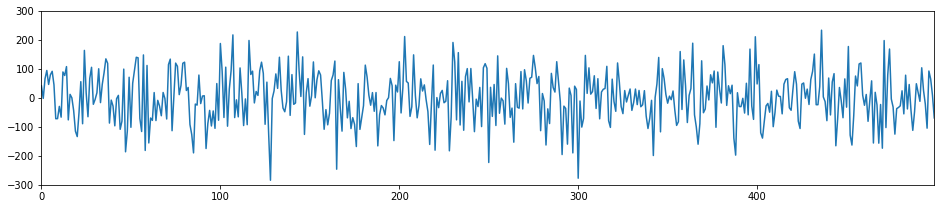

In [100]:
# pd.Series.clip
data = pd.Series(np.random.normal(0, 90, 500))
data.plot(figsize=plt.figaspect(0.2), ylim=[-300, 300])

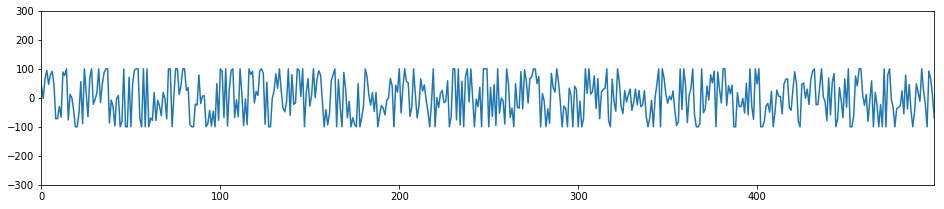

In [101]:
data = data.clip(lower=-100, upper=100)
data.plot(figsize=plt.figaspect(0.2), ylim=[-300, 300])

# Further readings
A pandas tutorial from SciPy 2017 including explanation about tidy data https://youtu.be/oGzU688xCUs. 

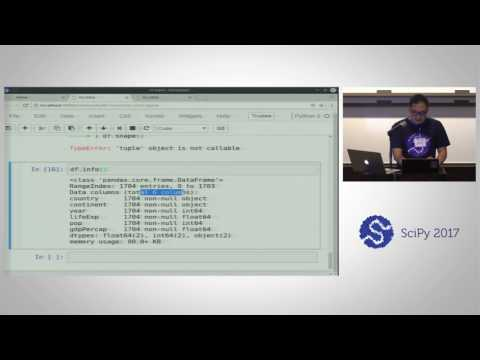

In [102]:
from IPython.display import YouTubeVideo
YouTubeVideo('oGzU688xCUs')

This and the two following chapters discuss important topics related to the topics from the lecture.
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

Here is the original tutorial by Hadley Wickham in R.
https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html